In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class Env:
    index_to_direction = [
        [ 0,-1],
        [ 0, 1],
        [-1, 0],
        [ 1, 0]]
    
    def __init__(self, n = 5,start_x = 3,start_y = 3,end_states = {(0,0)},random_start = True):
        self.start_x = start_x
        self.start_y = start_y
        self.x = self.start_x
        self.y = self.start_y
        self.n = n
        self.end_states = end_states
        self.random_start = random_start
        
    
    def is_valid(self,x,y):
        if x < 0 or x >= self.n or y < 0 or y >= self.n:
            return False
        return True
        
    def reset(self):
        if self.random_start:
            self.x = random.randint(0,self.n-1)
            self.y = random.randint(0,self.n-1)
        else:
            self.x = self.start_x
            self.y = self.start_y
        return (self.x,self.y)
    
    def get_actions(self):
        actions = []
        for i in range(len(self.index_to_direction)):
            if self.is_valid(self.x + self.index_to_direction[i][0],self.y + self.index_to_direction[i][1]):
                actions.append(i)
        return actions
        
    def get_random_action(self):
        return random.choice(self.get_actions())
    
    def step(self,action):
        self.x = self.x + self.index_to_direction[action][0]
        self.y = self.y + self.index_to_direction[action][1]
        
        reward = -1
        done = False
        if (self.x,self.y) in self.end_states:
            reward = 0
            done = True
            
        return (self.x,self.y),reward,done,None
            
    

In [3]:

def print_state_action(state_action):
    g = []
    for i in range(env.n):
        t = []
        for j in range(env.n):
            t.append(-9999.0)
        g.append(t)
        
    for k,v in state_action.items():
        g[k[0][0]][k[0][1]] = max(g[k[0][0]][k[0][1]],v[0])
    
    for i in range(env.n):
        for j in range(env.n):
            print("%-3.2f "%(g[i][j]),end="")
        print()


        
def print_heat_map(state_action):
    g = []
    for i in range(env.n):
        t = []
        for j in range(env.n):
            t.append(-9999.0)
        g.append(t)
        
    for k,v in state_action.items():
        g[k[0][0]][k[0][1]] = max(g[k[0][0]][k[0][1]],v[0])
    
    for i in range(env.n):
        for j in range(env.n):
            if(g[i][j] == -9999.0):
                g[i][j] = 0
    
    a = np.array(g)
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()

In [4]:

def get_action(observation):
    t = random.random()
#     print(exploration)
    if t < exploration:
        return env.get_random_action()
    else:
        action = env.get_random_action()
        best_score = 0
        for k,v in state_action.items():
            if k[0] == observation and v[0] > best_score:
                action = k[1]
                best_score = v[0]
        return action


def get_episode(no_of_steps):
    ## (state,action,reward)
    episode = []
    observation = env.reset()
    
    if observation in env.end_states:
        return episode
    
    for _ in range(no_of_steps):
        action = get_action(observation)
        new_observation, reward, done, _ = env.step(action)
        
        episode.append([observation,action,reward])
        observation = new_observation
        if done:
            break
    return episode

def eval_episode(episode):
    episode.reverse()
    reward_so_far = 0
    
    for state,action,reward in episode:
        reward_so_far = reward_so_far + reward
        if (state,action) in state_action:
            value,count = state_action[(state,action)]
            new_val = (value * count + reward_so_far) / (count + 1)
            state_action[(state,action)] = [new_val,count + 1]
        
        else:
            state_action[(state,action)] = [reward_so_far,1]
            

            
    

In [5]:
def train(episode_length = 10):
    global exploration
    for i in range(1,2000):
        ep = get_episode(episode_length)
#         print(ep)
        eval_episode(ep)
        exploration = exploration * 0.9999

In [8]:
## (state,action) -> [reward,count]
state_action = {}
exploration = 0.1
env = Env(n=15,end_states = {(3,3),(5,5)})
train(200)

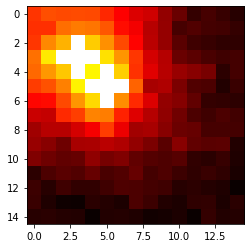

In [9]:
print_heat_map()